#  <span style="color:green">Machine Learning 1 - Presentation</span>

## <span style="color:Maroon"> BIKE-RENTAL</span>
This project predicts the daily count of bike rentals in a city based on the environmental conditions.

## <span style="color:maroon"> PROBLEM STATEMENT </span>
The aim of this project is to predict the count of bike rentals based on the seasonal and environmental settings. By predicting the count, it would be possible to help accommodate in managing the number of bikes required on a daily basis, and being prepared for high demand of bikes during peak periods.

## About the dataset 


**instant** : Record index<br>
**season** : Season (1:springer, 2:summer, 3:fall, 4:winter)<br>
**yr** : Year (0: 2011, 1:2012)<br>
**mnth** : Month (1 to 12)<br>
**hr** : Hour (0 to 23)<br>
**holiday** : weather day is holiday or not<br> 
**weekday** : Day of the week<br>
**workingday** : If day is neither weekend nor holiday is 1, otherwise is 0.<br>
**weathersit** : 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
**temp** : Normalized temperature in Celsius. <br>
**atemp** : Normalized feeling temperature in Celsius.<br>
**hum** : Normalized humidity. The values are divided to 100 (max)<br>
**windspeed** : Normalized wind speed. The values are divided to 67 (max)<br>
**casual** : count of casual users<br>
**registered** : count of registered users<br>
**cnt** : count of total rental bikes including both casual and registered<br>

#   <span style="color:Rainbow Indigo"> Import Libraries </span>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


#   <span style="color:Rainbow Indigo"> Read Data </span>


In [77]:
bike = pd.read_csv('day16.csv')
bike.shape

(730, 15)

In [78]:
bike.head() #Display the first 5rows of the dataframe

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#   <span style="color:Rainbow Indigo"> Data Analysis & Preparation </span>




###   Duplicate Check


In [79]:
# Create a dummy dataframe (copy of original bike df) for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)


In [80]:
bike_dup.shape # returns the dimension of the data

(730, 15)

We can see the dataframe has 15 columns and 730 observations.

In [81]:
# use 'info()' to understand the dataset
print(bike.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 91.2 KB
None


All coulmns are either float or integer type. Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type. - We will have to analyse and decide whether to convert them to categorical or treat as integer.

In [82]:
'''Some fields that are categorical in nature, but in integer/float type.
We have analysed and converted them to categorical. '''

    
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season'] = bike['season'].map(codes)

codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(codes)

codes = {1:'working_day',0:'Holiday'}
bike['workingday'] = bike['workingday'].map(codes)



codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['month'] = bike['mnth'].map(codes)

codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike['weekday'] = bike['weekday'].map(codes)

Displaying dataframe after converting to categorial...

In [83]:
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
0,1,spring,0,1,0,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,Jan
1,2,spring,0,1,0,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,Jan
2,3,spring,0,1,0,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Jan
3,4,spring,0,1,0,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Jan
4,5,spring,0,1,0,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Jan


In [84]:
#we rename few columns for better claraity on column_names
bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

##    Removing redundant & unwanted columns 

Based on the high level look at the data the following variables can be removed from further analysis: 
>casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these two columns.

>mnth & yr : Since we already have seperate columns for 'year' & 'month' we could live without this column.

>holiday : since working day already includes holidays.

In [85]:
bike.drop('casual',axis=1,inplace=True)
bike.drop('registered',axis=1,inplace=True)
bike.drop('holiday',axis=1,inplace=True)
bike.drop('mnth',axis=1,inplace=True)


In [86]:
bike['year']=bike['yr']

In [87]:
bike.head()

,instant,season,yr,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month,year
0,1,spring,0,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,Jan,0
1,2,spring,0,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,Jan,0
2,3,spring,0,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,Jan,0
3,4,spring,0,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,Jan,0
4,5,spring,0,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,Jan,0


In [88]:
bike.drop('yr',axis=1,inplace=True)


##   Change the incorrect data types 

In [89]:
# use .astype() to change the data type
# convert numerical variables to categorical


bike.season = bike.season.astype('object') # convert numeric variable 'season' to object (categorical) variable
bike.month = bike.month.astype('object') # convert numeric variable 'month' to object (categorical) variable
bike.weekday = bike.weekday.astype('object') # convert numeric variable 'weekday' to object (categorical) variable
bike.weathersit = bike.weathersit.astype('object') # convert numeric variable 'weathersit' to object (categorical) variable


In [90]:
# recheck the data types using .dtypes
bike.dtypes

instant         int64
season         object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
humidity      float64
windspeed     float64
count           int64
month          object
year            int64
dtype: object

# <span style="color:Rainbow Indigo"> Summary Statistics </span>

In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables
> For numerical variables, we use .describe()

> For categorical features, we use .describe(include=object)

In [91]:
# describe the numerical data
bike.describe()

,instant,temp,atemp,humidity,windspeed,count,year
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,4508.006849,0.500000
std,210.877136,7.506729,8.150308,14.237589,5.195841,1936.011647,0.500343
min,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000


The summary statistics for numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

In [92]:
# describe the categorical data
# include=object: selects the categorical features
bike_cat=bike.describe(include='object')
bike_cat

,season,weekday,workingday,weathersit,month
count,730,730,730,730,730
unique,4,7,2,3,12
top,fall,Sun,working_day,Clear,July
freq,188,105,499,463,62


The summary statistics for categorical variables can be interpreted as:

count - Total number of observations

unique - Number of unique classes in a variable

top - The most repeated class

freq - Frequency of most repeated class


In [93]:
bike[['temp','atemp','humidity','windspeed']].describe()

,temp,atemp,humidity,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


#  <span style="color:Rainbow Indigo">Check Missing Values</span>

 <span style="color:Glaucous">In order to get the count of missing values in each column, we use the in-built function .isnull().sum()</span>

In [94]:
bike.isnull().sum()

instant       0
season        0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
month         0
year          0
dtype: int64

The are no missing values present.



#  <span style="color:Rainbow Indigo">Visualize Missing Values using Heatmap</span>



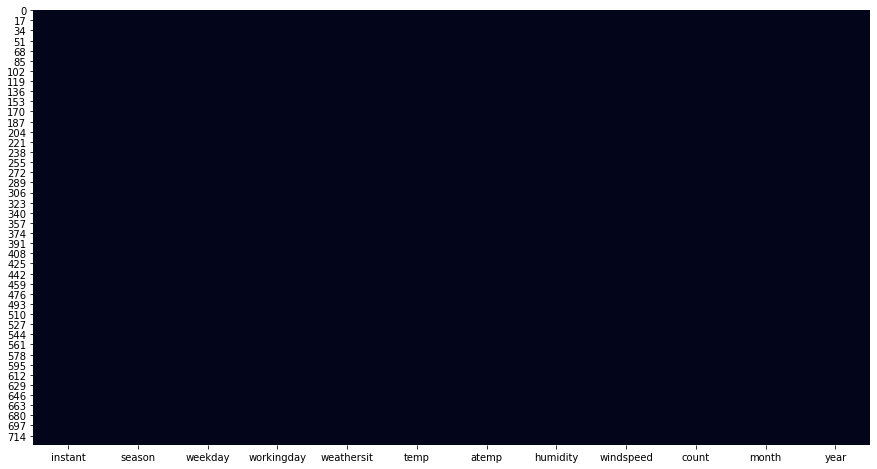

In [95]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(bike.isnull(), cbar=False)

# display the plot
plt.show()

In [96]:
bike.std()  # to compute the standard deviation

instant       210.877136
temp            7.506729
atemp           8.150308
humidity       14.237589
windspeed       5.195841
count        1936.011647
year            0.500343
dtype: float64

In [97]:
bike.skew() #skew() function to find the skewness in data 

instant      0.000000
temp        -0.057187
atemp       -0.133709
humidity    -0.067476
windspeed    0.676314
count       -0.049581
year         0.000000
dtype: float64

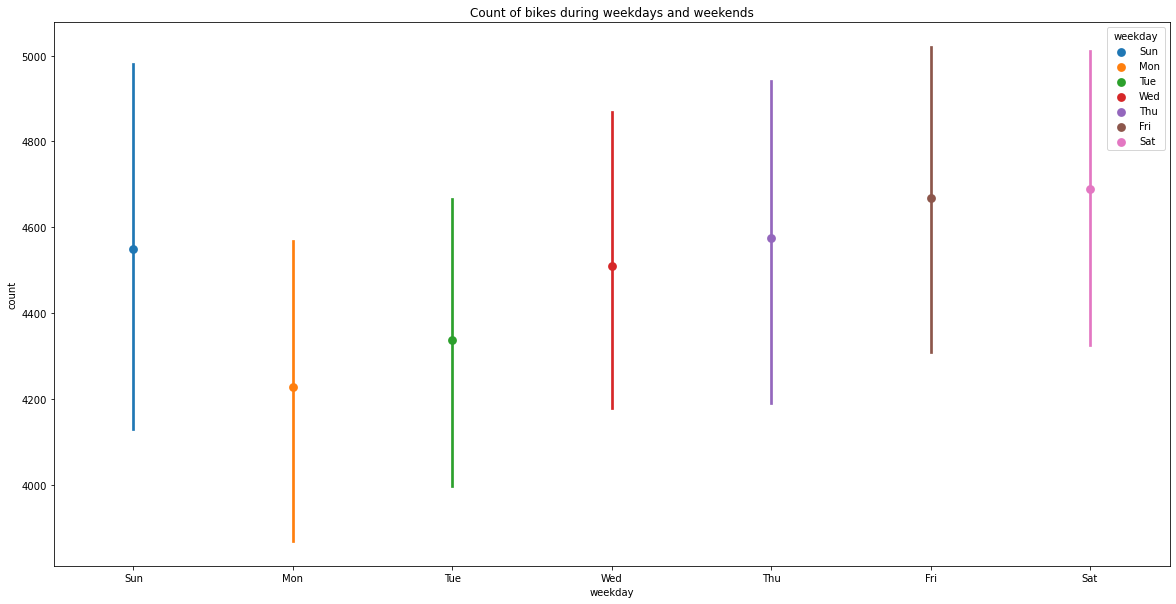

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bike, x='weekday', y='count',hue='weekday' ,ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')
plt.show()

#### The above graphy plot shows the count of bikes during weekdays and weekends.

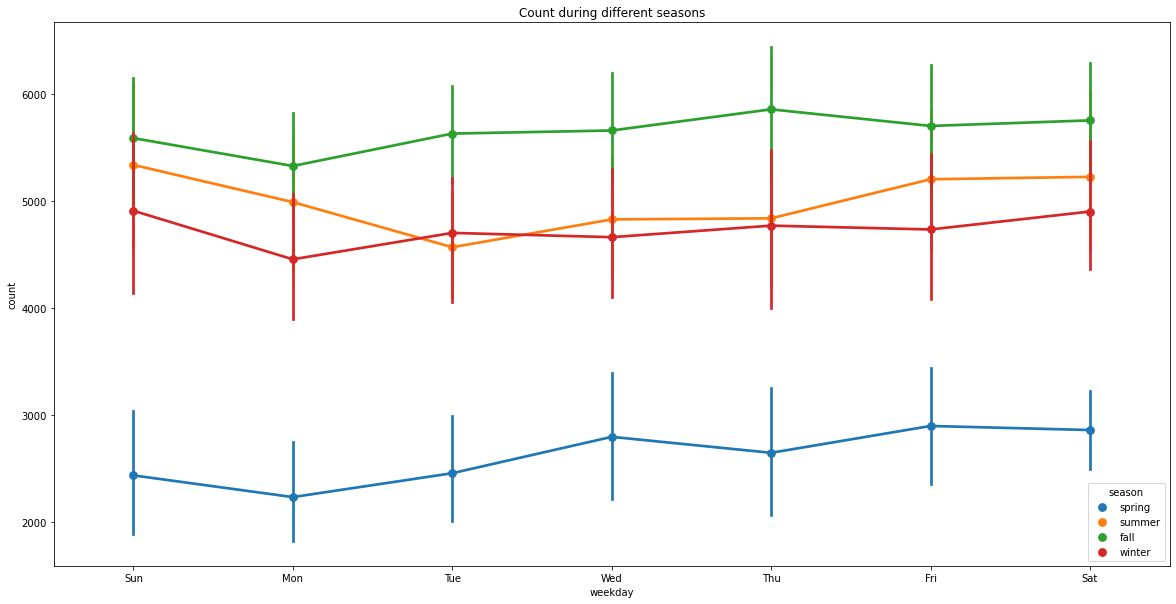

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=bike, x='weekday', y='count',hue='season' ,ax=ax)
ax.set(title='Count during different seasons')
plt.show()

#### The above graph plot shows the count of bikes during different seasons.

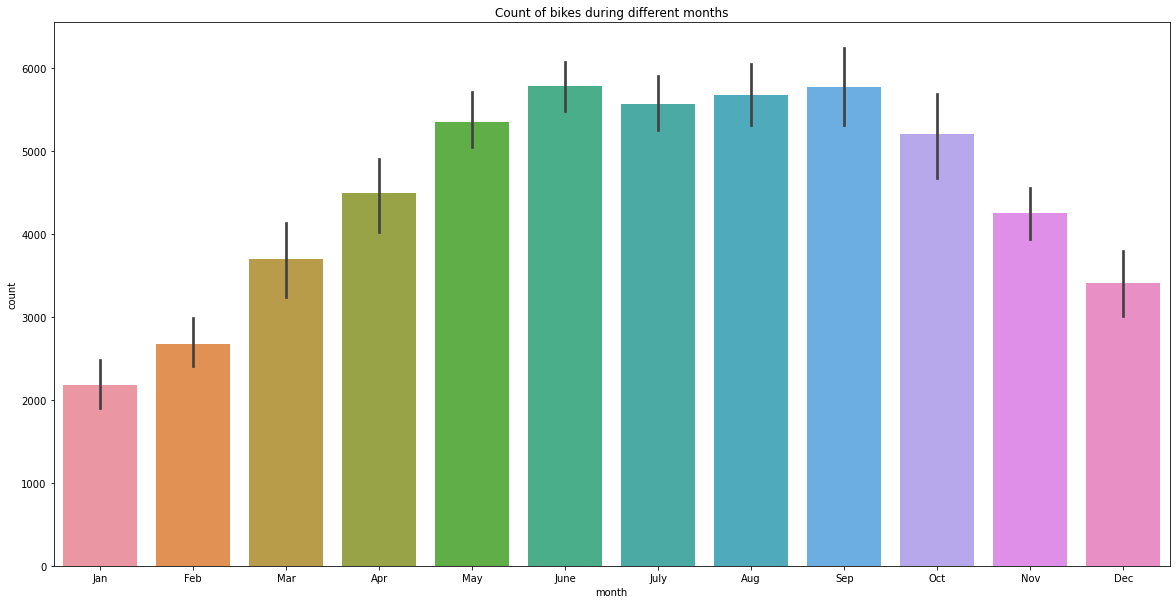

In [100]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=bike, x='month', y='count', ax=ax)
ax.set(title='Count of bikes during different months')
plt.show()

#### The above graph plot shows the count of bikes during different months.

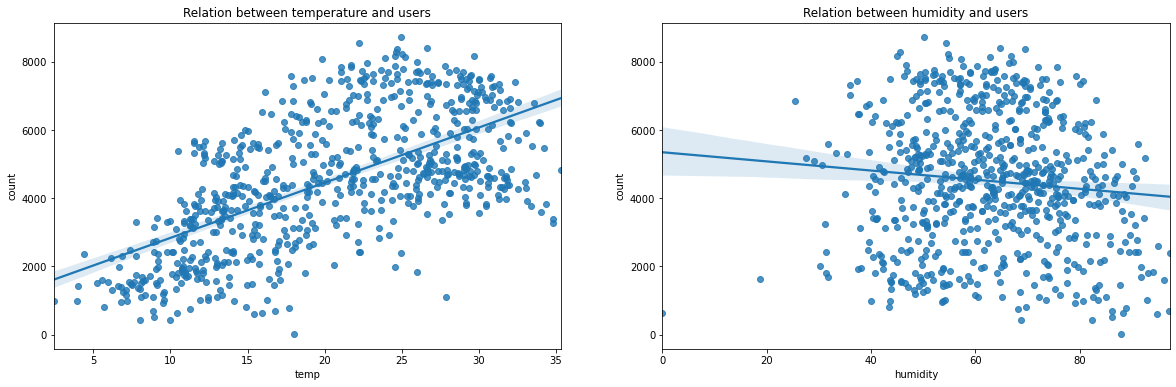

In [101]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=bike['temp'], y=bike['count'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=bike['humidity'], y=bike['count'], ax=ax2)
ax2.set(title="Relation between humidity and users")
plt.show()

#### Regression plots for temperature and humidity(independent variables) Vs. Count(dependent variable)

In [103]:
#user define func for plotting
def plots(variable):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.distplot(variable,kde=True,hist=True)
    
    plt.subplot(1,2,2)
    stats.probplot(variable,dist='norm',plot=plt)

skew checking 0.6763140387852972


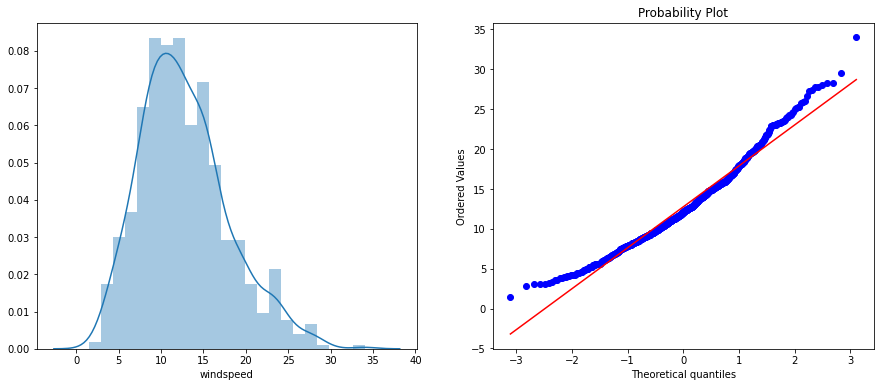

In [104]:
plots(bike['windspeed'])
print('skew checking',bike['windspeed'].skew())

In [ ]:
#a1=np.log(bike['windspeed'])
#print('\nSkew for log transformation : ',a1.skew())

#a2=np.sqrt(bike['windspeed'])
#print('Skew for Square Root transformation : ',a2.skew())

#a3=(1/(bike['windspeed']))
#print('Skew for Reciprocal transformation : ',a3.skew())

#a4=np.exp(bike['windspeed'])
#print('Skew for Exponential transformation : ',a4.skew())

#x,y=stats.boxcox(bike['windspeed'])
#a5=pd.DataFrame(x).skew()
#print('Skew for BoxCox transformation : ',a5)

In [106]:
#bike['windspeed']=x

#  <span style="color:Rainbow Indigo">Outlier detection </span>

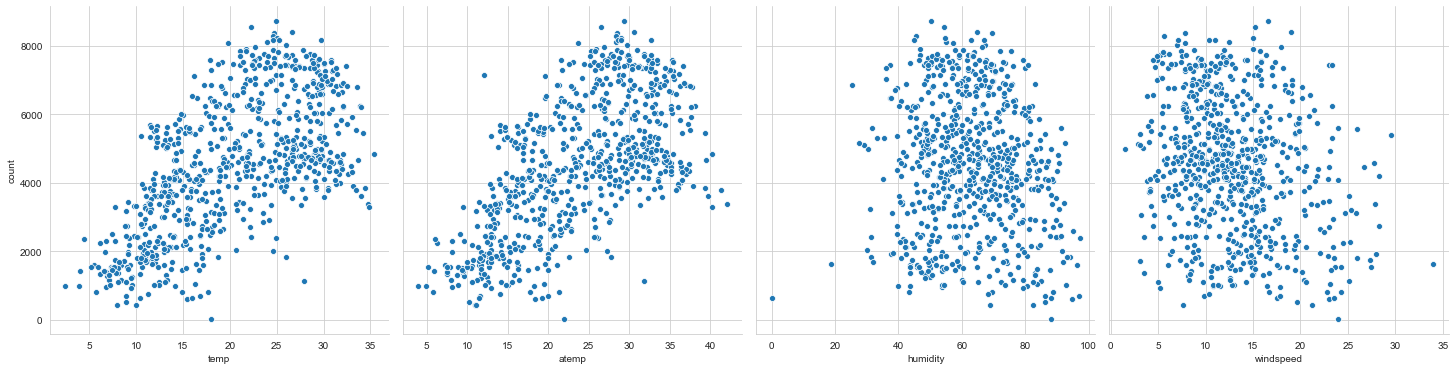

In [107]:
sns.set_style("whitegrid")
sns.pairplot(bike,x_vars=['temp','atemp','humidity','windspeed'],y_vars='count',kind='scatter',height=5,aspect=1)

###  Removal of extreme outliers

In [108]:
bike= bike.drop(index = bike[(bike['temp'] > 15) & (bike['temp'] < 20) & (bike['count'] < 100)].index)
bike = bike.drop(index = bike[(bike['temp'] > 25) & (bike['temp'] < 30) & (bike['count'] < 2000)].index)


# outliers in atemp
bike = bike.drop(index = bike[(bike['atemp'] > 20) & (bike['atemp'] < 25) & (bike['count'] < 100)].index)
bike = bike.drop(index = bike[(bike['atemp'] > 30) & (bike['atemp'] < 35) & (bike['count'] < 2000)].index)


#outliers in hum
bike = bike.drop(index = bike[(bike['humidity'] < 20)].index)

#outliers in windspeed
bike = bike.drop(index = bike[(bike['windspeed'] > 30)].index)
##bike = bike.drop(index = bike[(bike['windspeed'] == 8)].index)

In [31]:
bike

,instant,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,month,year
0,1,spring,Sun,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,Jan,0
1,2,spring,Mon,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,Jan,0
2,3,spring,Tue,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,Jan,0
3,4,spring,Wed,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,Jan,0
4,5,spring,Thu,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,Jan,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,spring,Fri,working_day,Mist,10.420847,11.33210,65.2917,23.458911,2114,Dec,1
726,727,spring,Sat,working_day,Mist,10.386653,12.75230,59.0000,10.416557,3095,Dec,1
727,728,spring,Sun,Holiday,Mist,10.386653,12.12000,75.2917,8.333661,1341,Dec,1
728,729,spring,Mon,Holiday,Clear,10.489153,11.58500,48.3333,23.500518,1796,Dec,1


###  After removal plot

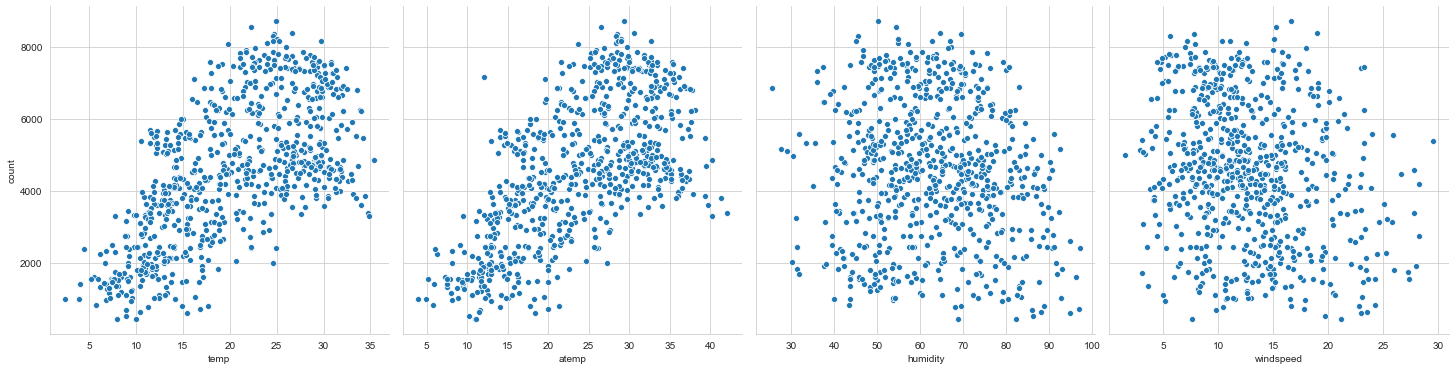

In [109]:
sns.set_style("whitegrid")
sns.pairplot(bike,x_vars=['temp','atemp','humidity','windspeed'],y_vars='count',kind='scatter',height=5,aspect=1)

##  <span style="color:Rainbow Indigo">Check for Normality</span>


The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population. 

A different way to say the same is that a variable’s values are a simple random sample from a normal distribution. As a 

rule of thumb, we reject the null hypothesis if p < 0.05.

In [33]:
bike.drop('instant',axis=1,inplace=True)

In [34]:
x,p=stats.shapiro(bike.temp)
print('p_val:',p)
print('Hence it is not normally distributed')

p_val: 5.189060552773794e-12
Hence it is not normally distributed


In [35]:
x,p=stats.shapiro(bike.atemp)
print('p_val:',p)
print('Hence it is not normally distributed')

p_val: 3.267933701422976e-10
Hence it is not normally distributed


In [36]:
x,p=stats.shapiro(bike.humidity)
print('p_val:',p)
print('Hence it is not normally distributed')

p_val: 0.004230096936225891
Hence it is not normally distributed


In [37]:
x,p=stats.shapiro(bike.windspeed)
print('p_val:',p)
print('Hence it is not normally distributed')

p_val: 3.2915364878149944e-10
Hence it is not normally distributed


So in this case we conclude that our variable is not normally distributed.
Why? Well,the p-value for the above test is less than 0.05 hence, they are not normally distributed.

##  <span style="color:Rainbow Indigo">Data Cleaning</span>
Checking value_counts() for entire dataframe. This will help to identify any Unknow/Junk values in the dataset.

In [38]:
#Create a copy of ca dataframe, without the 'instant' column, 
#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]


for col in bike_dummy:
    print(bike_dummy[col].value_counts(), '\n')

Mon    105
Tue    104
Sat    104
Wed    104
Sun    103
Thu    103
Fri    102
Name: weekday, dtype: int64 

working_day    496
Holiday        229
Name: workingday, dtype: int64 

Clear         462
Mist          245
Light Snow     18
Name: weathersit, dtype: int64 

26.035000    5
10.899153    5
17.937500    4
26.615847    4
19.850847    4
            ..
15.955847    1
27.025847    1
19.270000    1
20.978347    1
22.345000    1
Name: temp, Length: 495, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
32.73460    1
14.82130    1
6.31375     1
12.91020    1
9.31250     1
Name: atemp, Length: 684, dtype: int64 

61.3333    4
74.1250    3
72.9583    3
63.0833    3
69.7083    3
          ..
44.9583    1
71.2083    1
50.0417    1
58.0833    1
49.8750    1
Name: humidity, Length: 589, dtype: int64 

7.416900     3
11.166689    3
15.333486    3
7.125450     3
10.042161    3
            ..
8.250514     1
19.416332    1
16.522200    1
10.584057    

INSIGHTS: - There seems to be no Junk/Unknown values in the entire dataset. --

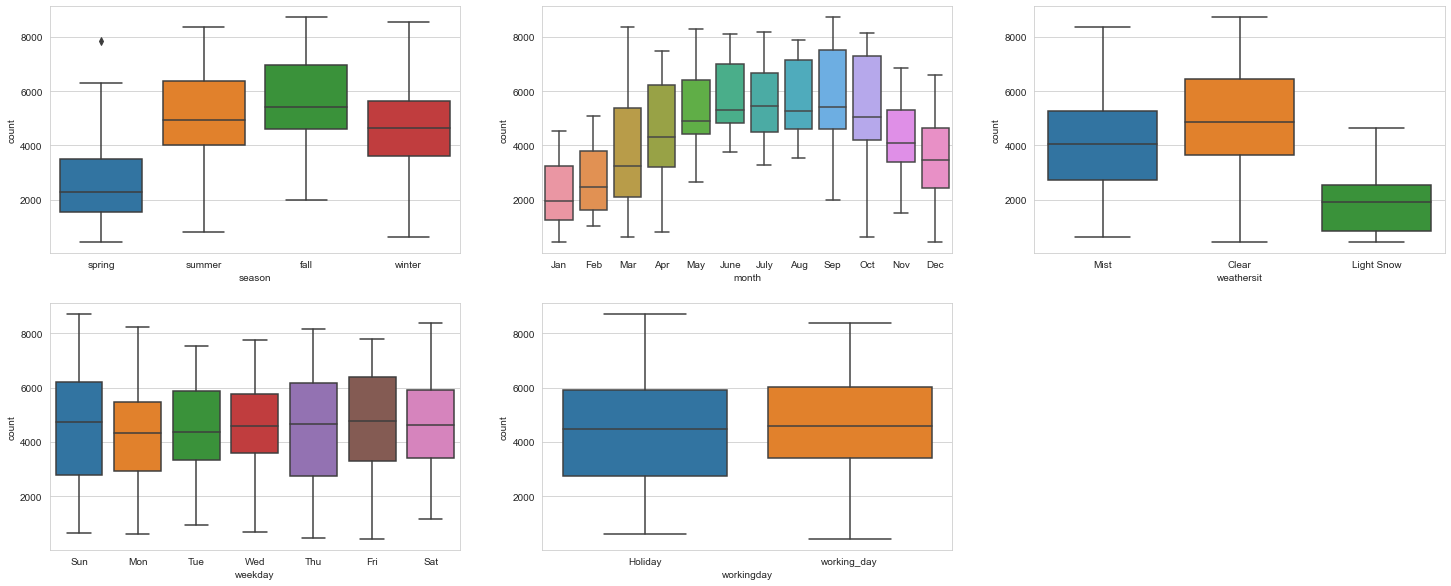

In [39]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.show()

In [40]:
bike = bike.drop(index = bike[(bike['season'] == 'spring') & (bike['count'] > 7000)].index)


#  <span style="color:Rainbow Indigo">Correlation</span>

>Correlation is the extent of linear relationship among numeric variables

>It indicates the extent to which two variables increase or decrease in parallel

>The value of a correlation coefficient ranges between -1 and 1

>Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated

In [41]:
# generate the correlation matrix
num_corr=bike[['temp','atemp','humidity','windspeed']].corr()

num_corr

,temp,atemp,humidity,windspeed
temp,1.000000,0.991731,0.122616,-0.160269
atemp,0.991731,1.000000,0.136732,-0.186682
humidity,0.122616,0.136732,1.000000,-0.246510
windspeed,-0.160269,-0.186682,-0.246510,1.000000


 Next we Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

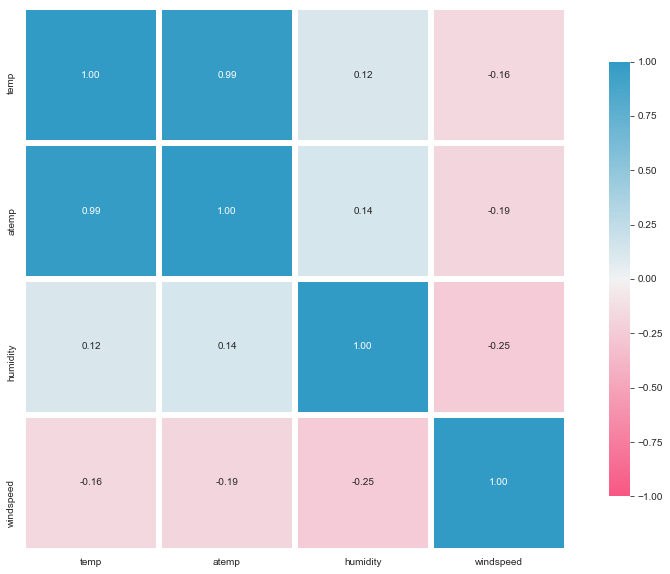

In [42]:
# set the figure size
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
sns.heatmap(num_corr, annot=True, fmt=".2f", linewidths=5, cmap=cmap, vmin=-1, vmax=1, cbar_kws={"shrink": .8}, square=True)


# display the plot
plt.show()


It can be observe that temp and atemp are highly correlated,therefore we will be  processing them in upcoming codes.

Rest of  the numeric variables are not correlated  with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.

Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.

Correlation does not imply causation. In other words, if two variables are correlated it does not mean that one variable caused the other


In [43]:
correlation = bike[['temp','atemp','humidity','windspeed','count']].corr()['count'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='count',ascending=False)
correlation.drop(index=['count'],inplace=True)
correlation

,count
atemp,0.6398
temp,0.6366
humidity,-0.1101
windspeed,-0.2163


In [44]:
bike[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991731
atemp,0.991731,1.000000


Since, temp and atemp are highly correlated, we will drop atemp.

In [45]:
bike.drop('atemp',axis=1,inplace=True) #drop atemp variable

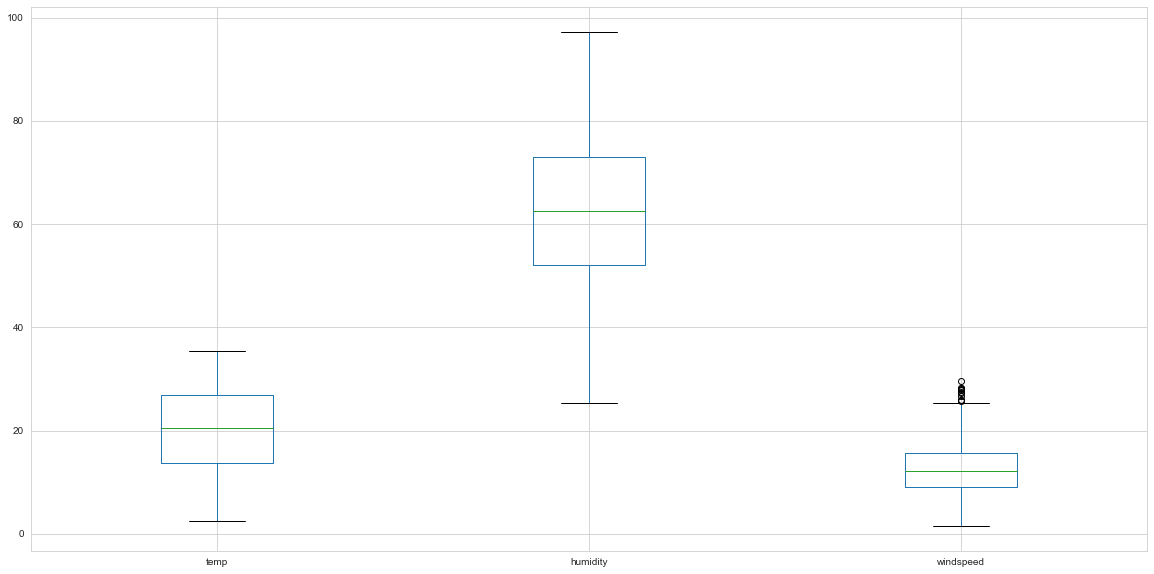

In [46]:
plt.rcParams['figure.figsize']=(20,10)

# create a boxplot for all numeric features
# column: selects the specified columns
bike.boxplot(column=['temp','humidity', 'windspeed'])

# to display the plot
plt.show()

In [47]:
bike_new=bike[['season', 'year', 'month', 'weekday',
       'workingday', 'weathersit', 'temp', 'humidity', 'windspeed',
       'count']]

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      724 non-null    object 
 1   year        724 non-null    int64  
 2   month       724 non-null    object 
 3   weekday     724 non-null    object 
 4   workingday  724 non-null    object 
 5   weathersit  724 non-null    object 
 6   temp        724 non-null    float64
 7   humidity    724 non-null    float64
 8   windspeed   724 non-null    float64
 9   count       724 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 62.2+ KB


In [48]:
#bike_new = pd.get_dummies(bike_new,drop_first=True)


# We will visualise the changes after the dummy creation.

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      724 non-null    object 
 1   year        724 non-null    int64  
 2   month       724 non-null    object 
 3   weekday     724 non-null    object 
 4   workingday  724 non-null    object 
 5   weathersit  724 non-null    object 
 6   temp        724 non-null    float64
 7   humidity    724 non-null    float64
 8   windspeed   724 non-null    float64
 9   count       724 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 62.2+ KB


# <span style="color:Rainbow Indigo"> Dummy Encoding of Categorical Variables</span>

To build linear regression models we use OLS method.It is seen above that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding.

We will create DUMMY variables for 5 categorical variables 'month', 'weekday', 'season','working' & 'weathersit'. 

In [49]:
seasons = pd.get_dummies(bike['season'],drop_first=True)

working_day = pd.get_dummies(bike['workingday'],drop_first=True)

weather= pd.get_dummies(bike['weathersit'],drop_first=True)

month= pd.get_dummies(bike['month'],drop_first=True)

week_day= pd.get_dummies(bike['weekday'],drop_first=True)

In [50]:
bike

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,month,year
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,Jan,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,Jan,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,Jan,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,Jan,0
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,Jan,0
...,...,...,...,...,...,...,...,...,...,...
725,spring,Fri,working_day,Mist,10.420847,65.2917,23.458911,2114,Dec,1
726,spring,Sat,working_day,Mist,10.386653,59.0000,10.416557,3095,Dec,1
727,spring,Sun,Holiday,Mist,10.386653,75.2917,8.333661,1341,Dec,1
728,spring,Mon,Holiday,Clear,10.489153,48.3333,23.500518,1796,Dec,1


Next, Concatenate numerical and dummy encoded categorical variables

In [51]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
bike= pd.concat([bike,seasons,working_day,weather,month,week_day],axis=1)

# display data with dummy variables
bike.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,month,year,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,Jan,0,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,Jan,0,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,Jan,0,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,Jan,0,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,Jan,0,...,0,0,0,0,0,0,0,1,0,0


Drop original variable for which the dummy was created

In [52]:

bike.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)
bike.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#  <span style="color:Rainbow Indigo"> SPLITTING THE DATA</span>

>Splitting the data to Train and Test

>We will now split the data into TRAIN and TEST (70:30 ratio)



In [53]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
df_train.isnull().sum()

temp           0
humidity       0
windspeed      0
count          0
year           0
spring         0
summer         0
winter         0
working_day    0
Light Snow     0
Mist           0
Aug            0
Dec            0
Feb            0
Jan            0
July           0
June           0
Mar            0
May            0
Nov            0
Oct            0
Sep            0
Mon            0
Sat            0
Sun            0
Thu            0
Tue            0
Wed            0
dtype: int64

#  <span style="color:Rainbow Indigo"> Feature scaling </span>

●It is a technique used to transform the data into a common scale

●Since the features have various ranges, it becomes a necessary step in data preprocessing while using machine learning algorithms

●Feature scaling has 2 methods Standardization & Normalization



###   <span style="color:brown">Standardization</span>
●we have gone for Standardization as, Min-  Max  tries  to  get  the  values  closer  to  mean.  But  when  there  are  outliers  in  the  data  which  are important and we don’t want to lose their impact, we go with Z score. In this case, we rescale an originalvariable to have a mean of zero and a standard deviation of one. It does not have any units: hence isuseful for comparing variables expressed in different units.   Standardization makes no difference to theshape of a distribution.

●Standardization rescales the feature such that it has mean 0 and unit variance

●The procedure involves subtracting the mean from observation and then dividingby the standard deviation


In [55]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [56]:

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [57]:
df_train

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
422,-0.672634,-0.996103,1.011236,-0.097569,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,-1.278976,-1.049295,2.102379,-1.378403,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
614,1.169174,0.744457,-0.260171,1.515897,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
113,0.503572,1.273419,0.010620,-0.163994,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
579,1.511094,0.079558,0.322144,1.349074,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.346972,0.513959,-0.982200,1.398766,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
54,-1.061137,0.468859,0.779912,-1.372825,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
354,-0.335276,1.610301,0.396117,-0.940303,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
81,-0.780462,1.477193,0.565762,-1.213609,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## <span style="color:Rainbow Indigo">BUILDING A LINEAR MODEL</span>
#### Dividing into X and Y sets for the model building

In [58]:
y_train = df_train.pop('count')
X_train = df_train

### RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [59]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('temp', True, 1),
 ('humidity', False, 8),
 ('windspeed', False, 9),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('working_day', False, 2),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 18),
 ('Dec', True, 1),
 ('Feb', False, 5),
 ('Jan', False, 3),
 ('July', False, 7),
 ('June', False, 16),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 6),
 ('Sat', False, 10),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 15),
 ('Wed', False, 17)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'winter', 'Light Snow', 'Mist', 'Dec', 'Nov',
       'Sep', 'Sun'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     248.8
Date:                Sun, 16 May 2021   Prob (F-statistic):          6.71e-186
Time:                        16:04:10   Log-Likelihood:                -263.54
No. Observations:                 506   AIC:                             549.1
Df Residuals:                     495   BIC:                             595.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3062      0.042     -7.255      0.000      -0.389      -0.223
temp           0.4019      0.030     13.402      0.000       0.343       0.461
year           1.0435      0.037     28.179      0.000       0.971       1.116
spring        -0.6272      0.069     -9.026      0.000      -0.764      -0.491
winter         0.4001      0.063      6.390      0.000       0.277       0.523
Light Snow    -1.1144      0.135     -8.278      0.000      -1.379      -0.850
Mist          -0.3267      0.039     -8.430      0.000      -0.403      -0.251
Dec           -0.2938      0.073     -4.020      0.000      -0.437      -0.150
Nov           -0.3813      0.083     -4.589      0.000      -0.545      -0.218
Sep            0.2454      0.070      3.523      0.000       0.109       0.382
Sun            0.0700      0.053      1.329      0.184      -0.033       0.173
==============================================================================
Omnibus:                       86.863   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.672
Skew:                          -0.912   Prob(JB):                     1.45e-42
Kurtosis:                       5.411   Cond. No.                         9.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_train1= X_train_rfe.drop('Sun',1)

In [64]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [65]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     275.8
Date:                Sun, 16 May 2021   Prob (F-statistic):          9.46e-187
Time:                        16:04:13   Log-Likelihood:                -264.44
No. Observations:                 506   AIC:                             548.9
Df Residuals:                     496   BIC:                             591.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2949      0.041     -7.128      0.000      -0.376      -0.214
temp           0.3998      0.030     13.341      0.000       0.341       0.459
year           1.0446      0.037     28.194      0.000       0.972       1.117
spring        -0.6313      0.069     -9.088      0.000      -0.768      -0.495
winter         0.3960      0.063      6.327      0.000       0.273       0.519
Light Snow    -1.1116      0.135     -8.251      0.000      -1.376      -0.847
Mist          -0.3274      0.039     -8.442      0.000      -0.404      -0.251
Dec           -0.2898      0.073     -3.966      0.000      -0.433      -0.146
Nov           -0.3840      0.083     -4.619      0.000      -0.547      -0.221
Sep            0.2482      0.070      3.562      0.000       0.111       0.385
==============================================================================
Omnibus:                       82.905   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.615
Skew:                          -0.878   Prob(JB):                     3.65e-40
Kurtosis:                       5.352   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X_train_new= X_train2.drop('const',axis=1)

#  <span style="color:Rainbow Indigo"> Building Linear Model using 'STATS MODEL' </span>

### VIF Check

In [67]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,2.51
2,spring,2.16
0,temp,2.03
7,Nov,1.78
1,year,1.71
6,Dec,1.46
5,Mist,1.42
8,Sep,1.15
4,Light Snow,1.04


In [68]:
y_train_pred = lm1.predict(X_train2)

In [69]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

In [70]:
y_test = df_test.pop('count')
X_test = df_test
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_test_pred = lm1.predict(X_test_new)

In [71]:
df_test

,temp,humidity,windspeed,year,spring,summer,winter,working_day,Light Snow,Mist,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
242,0.913877,-0.236636,-1.425072,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
678,-0.549542,0.100246,-1.761269,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
591,1.187413,-0.082975,-0.284903,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
534,1.087113,0.416440,-0.571852,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
151,1.501980,0.324830,0.207385,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.234593,-1.007918,-0.998517,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
342,-1.087501,0.457809,-1.433205,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
74,-0.680566,1.030076,0.154952,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
476,-0.508512,1.447775,2.020492,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
X_train2

,const,temp,year,spring,winter,Light Snow,Mist,Dec,Nov,Sep
422,1.0,-0.672634,1,1,0,0,0,0,0,0
728,1.0,-1.278976,1,1,0,0,0,1,0,0
614,1.0,1.169174,1,0,0,0,0,0,0,1
113,1.0,0.503572,0,0,0,0,1,0,0,0
579,1.0,1.511094,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
583,1.0,1.346972,1,0,0,0,1,0,0,0
54,1.0,-1.061137,0,1,0,0,1,0,0,0
354,1.0,-0.335276,0,1,0,0,1,1,0,0
81,1.0,-0.780462,0,0,0,0,1,0,0,0


##  <span style="color:Rainbow Indigo"> Assumptions in ML </span>

#### 1.  Linearity : Their should be linear association between the independent and dependent variables 

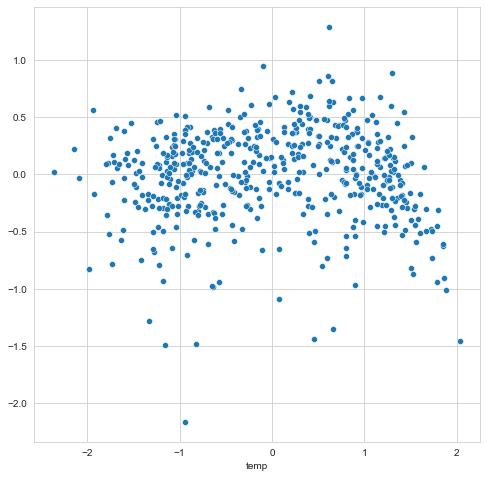

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(X_train2['temp'], lm.resid )
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

#### 2.  No Autocorrelation : All the instances of a feature must be independent with its first lags. This tells us about the nature of data, and can be tested using Durbin-Watson t statistic. The statistic value closer to 2 indicated no autocorrelation

In [74]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     248.8
Date:                Sun, 16 May 2021   Prob (F-statistic):          6.71e-186
Time:                        16:04:28   Log-Likelihood:                -263.54
No. Observations:                 506   AIC:                             549.1
Df Residuals:                     495   BIC:                             595.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3062      0.042     -7.255      0.000      -0.389      -0.223
temp           0.4019      0.030     13.402      0.000       0.343       0.461
year           1.0435      0.037     28.179      0.000       0.971       1.116
spring        -0.6272      0.069     -9.026      0.000      -0.764      -0.491
winter         0.4001      0.063      6.390      0.000       0.277       0.523
Light Snow    -1.1144      0.135     -8.278      0.000      -1.379      -0.850
Mist          -0.3267      0.039     -8.430      0.000      -0.403      -0.251
Dec           -0.2938      0.073     -4.020      0.000      -0.437      -0.150
Nov           -0.3813      0.083     -4.589      0.000      -0.545      -0.218
Sep            0.2454      0.070      3.523      0.000       0.109       0.382
Sun            0.0700      0.053      1.329      0.184      -0.033       0.173
==============================================================================
Omnibus:                       86.863   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.672
Skew:                          -0.912   Prob(JB):                     1.45e-42
Kurtosis:                       5.411   Cond. No.                         9.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 1.894). Thus, we conclude that there is no autocorrelation.

#### 3. Normality : The errors or residuals must be normally distributed i.e it must follow Gaussian distribution which can be tested using Anderson Darling, Shapiro Wilk and Kolmogorov Smirnov test. Additionally it can also be graphically viewed by QQ-plot

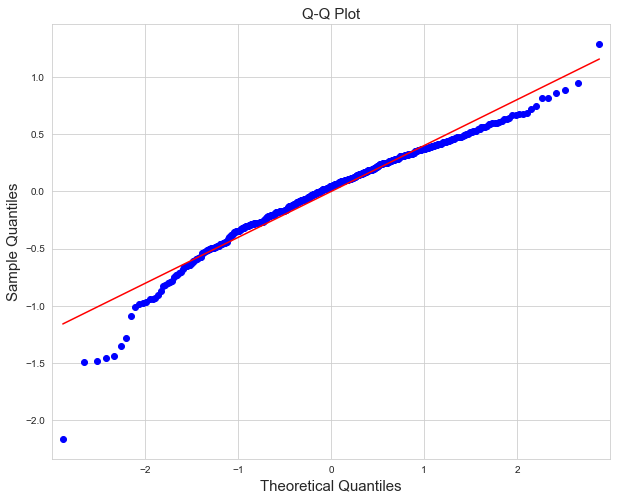

In [75]:
plt.rcParams['figure.figsize'] = [10,8]


qqplot(lm.resid, line = 'r')


plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)


plt.show()

In [76]:
from scipy import stats
from scipy.stats import shapiro
stat, p_value = shapiro(lm.resid)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9590017795562744
P-Value: 1.1710991898450374e-10


<AxesSubplot:ylabel='Density'>

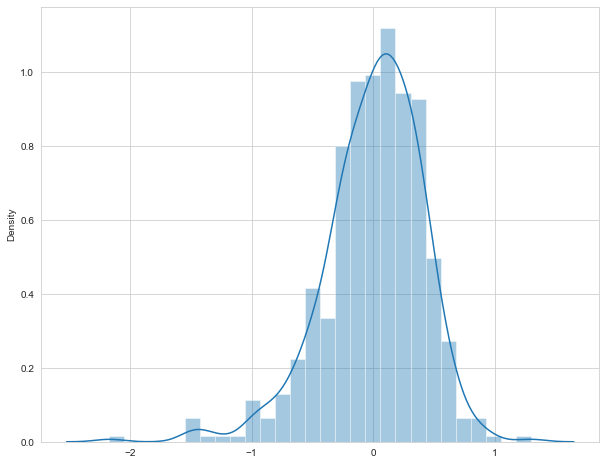

In [77]:
sns.distplot(lm.resid)

**Interpretation:** From the above plots, we can observe that the residuals are normally distributed.

##   <span style="color:Rainbow Indigo">Model Evaluation</span>

#### RMSE

In [81]:
from statsmodels.tools.eval_measures import rmse

linreg_with_interaction_rmse = rmse(y_test, y_test_pred)

linreg_with_interaction_rmse

0.3968537869247527

In [82]:
bike.head()


,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


##  <span style="color:Rainbow Indigo"> Create generalized functions to calculate various metrics for models </span>

#### Create a generalized function to calculate the RMSE for train and test set.

In [83]:
def get_train_rmse(model):
    train_pred = model.predict(X_train2)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

In [84]:
def get_test_rmse(model):
    test_pred = model.predict(X_test_new)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

#### Create a generalized function to calculate the MAPE for test set.

In [85]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    test_pred = model.predict(X_test_new)
    mape_test = mape(y_test, test_pred)
    return(mape_test)

#### Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [86]:
def get_score(model):
    r_sq = model.score(X_train2, y_train)
    n = X_train2.shape[0]
    k = X_train2.shape[1]
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    return ([r_sq, r_sq_adj])

#### Create a generalized function to create a dataframe containing the scores from all the models

In [87]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model),
                       'Train_RMSE': get_train_rmse(model),           
                       'Test_RMSE': get_test_rmse(model),
                       'Train_RMSE-Test_RMSE': get_train_rmse(model)- get_test_rmse(model),       
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

#### Create a generalized function to plot a barchart for the coefficients

In [88]:
def plot_coefficients(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X_train2.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

##   <span style="color:Rainbow Indigo">Multiple Linear Regression (OLS)</span>

#### Build a MLR model on a training dataset.

In [89]:
linreg = LinearRegression()
MLR_model = linreg.fit(X_train2, y_train)
MLR_model.score(X_train2, y_train)

0.8334811812943212

In [90]:
print('RMSE on train set: ', get_train_rmse(MLR_model))
print('RMSE on test set: ', get_test_rmse(MLR_model))
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.4081
RMSE on test set:  0.3969
Difference between RMSE on train and test set:  0.011200000000000043


**Interpretation:** RMSE on the training set is 0.40, while on the test set it is 0.39. We can see that there is little difference in the RMSE of the train and the test set. 

In [91]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112


##   <span style="color:Rainbow Indigo">Cross Validation</span>

#### 4.1 K-Fold Cross Validation


In [92]:
kf = KFold(n_splits = 5)

In [93]:
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                   
    return model.score(X_test_k, y_test_k)

In [94]:
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train2.iloc[train_index], X_train2.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.8467203076912301, 0.862053428972363, 0.700275657197146, 0.7995888372777442, 0.8848704555038787]

Minimum score obtained:  0.7003
Maximum score obtained:  0.8849
Average score obtained:  0.8187


#### K-Fold Cross Validation using `cross_val_score()`

In [95]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train2, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [96]:
print('All scores: ', scores)
print("\nMinimum score obtained: ", round(min(scores), 4))
print("Maximum score obtained: ", round(max(scores), 4))
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.84672031 0.86205343 0.70027566 0.79958884 0.88487046]

Minimum score obtained:  0.7003
Maximum score obtained:  0.8849
Average score obtained:  0.8187


We can see that we got the same scores from `KFold()` and `cross_val_score()`.

##  <span style="color:Rainbow Indigo">Leave One Out Cross Validation (LOOCV) </span>

In [97]:
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                               
    return model.score(X_test_k, y_test_k)

In [98]:
loocv_rmse = []

loocv = LeaveOneOut()


for train_index, test_index in loocv.split(X_train):
     
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    linreg = LinearRegression()
    
    linreg.fit(X_train_l, y_train_l)
    
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    rmse = np.sqrt(mse)
    
    loocv_rmse.append(rmse)

In [99]:
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0001
Maximum rmse obtained:  2.1306
Average rmse obtained:  0.2896


##  <span style="color:Rainbow Indigo">Gradient Descent</span>

#### Stochastic Gradient Descent

#####  Build MLR model using SGD method.

In [100]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train2, y_train)
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 0.434
RMSE on test set: 0.4389


#### Visualize the change in values of coefficients obtained from `MLR_model (using OLS)` and `linreg_with_SGD`

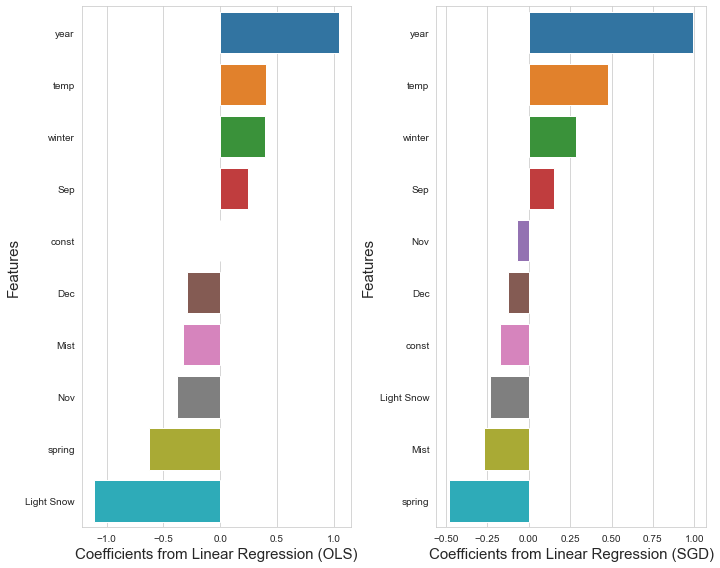

In [101]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')
plt.tight_layout()
plt.show()

**Interpretation:** The coefficients obtained from SGD have smaller values as compared to the coefficients obtained from linear regression using OLS.

In [102]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049


## <span style="color:Rainbow Indigo">Regularization</span>

In [103]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV

#### Ridge Regularization

#### Build regression model using Ridge Regression for alpha = 1.

In [104]:
ridge = Ridge(alpha = 1, max_iter = 500)


ridge.fit(X_train2, y_train)

print('RMSE on train set:', get_train_rmse(ridge))
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on train set: 0.4084
RMSE on test set: 0.3977


In [105]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049
2,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.3977,134.414052,0.4084,0.0107


#### Build regression model using Ridge Regression for alpha = 2.

In [106]:
ridge = Ridge(alpha = 2, max_iter = 500)
ridge.fit(X_train2, y_train)
print('RMSE on train set:', get_train_rmse(ridge))
print('RMSE on test set:', get_test_rmse(ridge))

RMSE on train set: 0.4092
RMSE on test set: 0.3993


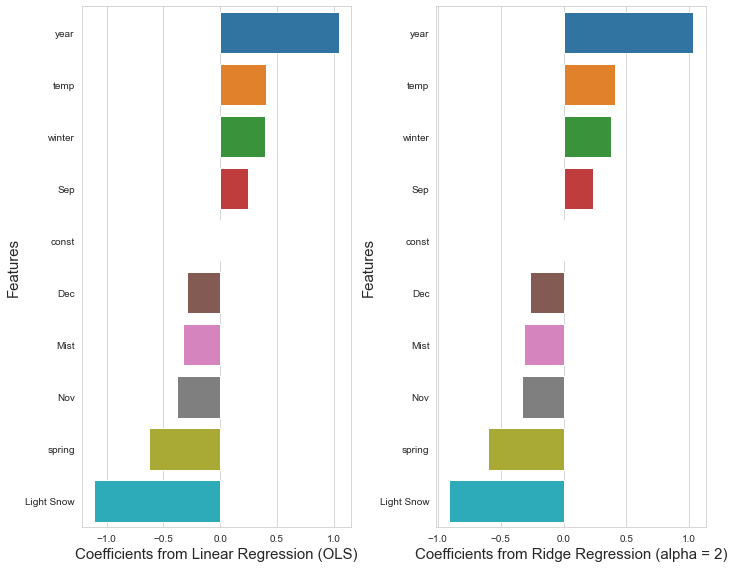

In [107]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 2)')
plt.tight_layout()
plt.show()

**Interpretation:** The coefficients obtained from ridge regression have smaller values as compared to the coefficients obtained from linear regression using OLS.

In [108]:
update_score_card(algorithm_name = 'Ridge Regression (with alpha = 2)', model = ridge, alpha = '2')
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049
2,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.3977,134.414052,0.4084,0.0107
3,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.3993,134.624801,0.4092,0.0099


##  <span style="color:Rainbow Indigo">Lasso Regression</span> 

In [109]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(X_train2, y_train)
print('RMSE on train set:', get_train_rmse(lasso))
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on train set: 0.4269
RMSE on test set: 0.4162


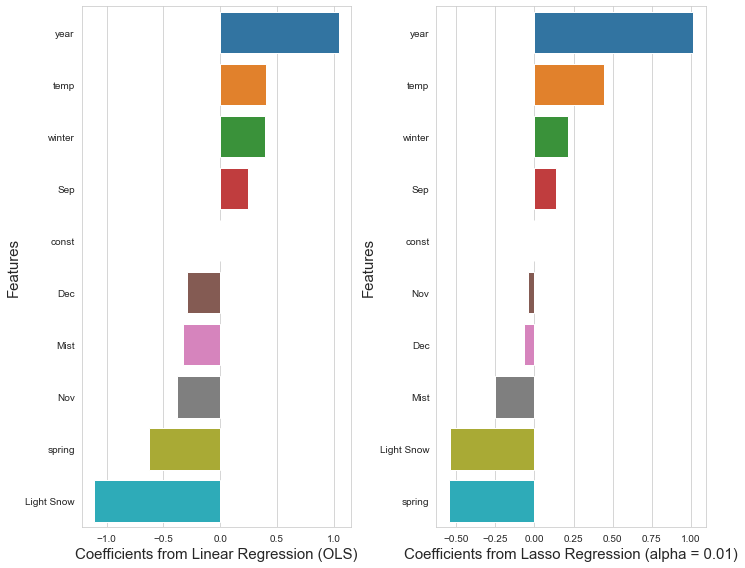

In [110]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')
plt.tight_layout()
plt.show()

**Interpretation:** The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

Let us print the list of variables with zero coefficient.

In [111]:
df_lasso_coeff = pd.DataFrame({'Variable': X_train2.columns, 'Coefficient': lasso.coef_})


print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['const']

In [112]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049
2,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.3977,134.414052,0.4084,0.0107
3,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.3993,134.624801,0.4092,0.0099
4,Lasso Regression,0.01,-,0.817723,0.814041,0.4162,137.854872,0.4269,0.0107


##   <span style="color:Rainbow Indigo">Elastic Net Regression</span>

In [113]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)
enet.fit(X_train2, y_train)
print('RMSE on train set:', get_train_rmse(enet))
print('RMSE on test set:', get_test_rmse(enet))

RMSE on train set: 0.4726
RMSE on test set: 0.4676


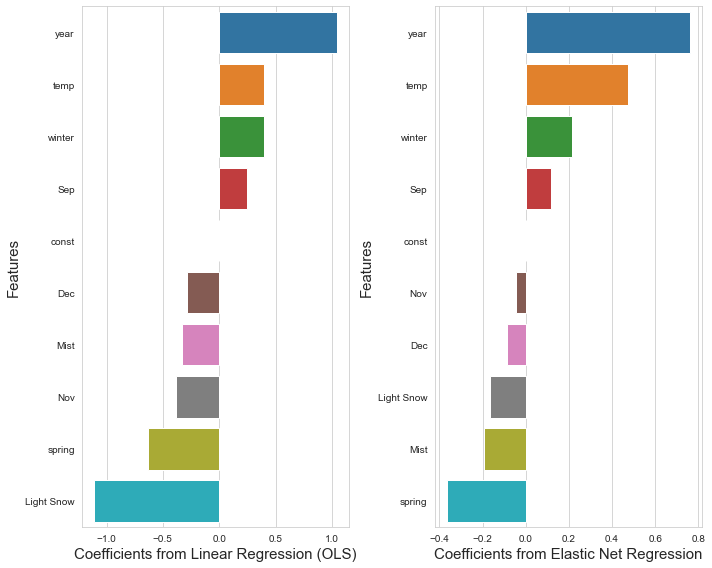

In [114]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')
plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')
plt.tight_layout()
plt.show()

In [115]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049
2,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.3977,134.414052,0.4084,0.0107
3,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.3993,134.624801,0.4092,0.0099
4,Lasso Regression,0.01,-,0.817723,0.814041,0.4162,137.854872,0.4269,0.0107
5,Elastic Net Regression,0.1,0.01,0.776685,0.772174,0.4676,147.093388,0.4726,0.0050


##  <span style="color:Rainbow Indigo">GridSearchCV</span>

### Find optimal value of alpha for `Ridge Regression`

In [116]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
ridge_grid.fit(X_train2, y_train)
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('RMSE on train set:', get_train_rmse(ridge_grid))
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on train set: 0.4081
RMSE on test set: 0.3969


In [117]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049
2,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.3977,134.414052,0.4084,0.0107
3,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.3993,134.624801,0.4092,0.0099
4,Lasso Regression,0.01,-,0.817723,0.814041,0.4162,137.854872,0.4269,0.0107
5,Elastic Net Regression,0.1,0.01,0.776685,0.772174,0.4676,147.093388,0.4726,0.0050
6,Ridge Regression (using GridSearchCV),0.1,-,0.833478,0.830114,0.3969,134.331641,0.4081,0.0112


### Find optimal value of alpha for `Lasso Regression`

In [118]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
lasso = Lasso()

lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

lasso_grid.fit(X_train2, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on train set:', get_train_rmse(lasso_grid))

print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 1e-15} 

RMSE on train set: 0.4081
RMSE on test set: 0.3969


In [119]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049
2,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.3977,134.414052,0.4084,0.0107
3,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.3993,134.624801,0.4092,0.0099
4,Lasso Regression,0.01,-,0.817723,0.814041,0.4162,137.854872,0.4269,0.0107
5,Elastic Net Regression,0.1,0.01,0.776685,0.772174,0.4676,147.093388,0.4726,0.0050
6,Ridge Regression (using GridSearchCV),0.1,-,0.833478,0.830114,0.3969,134.331641,0.4081,0.0112
7,Lasso Regression (using GridSearchCV),1e-15,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112


### Find optimal value of alpha for `Elastic Net Regression`

In [120]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

enet = ElasticNet()


enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train2, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('RMSE on train set:', get_train_rmse(enet_grid))
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.0001} 

RMSE on train set: 0.4081
RMSE on test set: 0.3969


In [121]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
1,Linear Regression (using SGD),-,-,0.811613,0.807807,0.4389,141.920833,0.4340,-0.0049
2,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.3977,134.414052,0.4084,0.0107
3,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.3993,134.624801,0.4092,0.0099
4,Lasso Regression,0.01,-,0.817723,0.814041,0.4162,137.854872,0.4269,0.0107
5,Elastic Net Regression,0.1,0.01,0.776685,0.772174,0.4676,147.093388,0.4726,0.0050
6,Ridge Regression (using GridSearchCV),0.1,-,0.833478,0.830114,0.3969,134.331641,0.4081,0.0112
7,Lasso Regression (using GridSearchCV),1e-15,-,0.833481,0.830117,0.3969,134.325076,0.4081,0.0112
8,Elastic Net Regression (using GridSearchCV),0.0001,0.0001,0.833480,0.830116,0.3969,134.328440,0.4081,0.0112


In [122]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)
score_card.style.highlight_min(color = 'lightblue', subset = 'Train_RMSE-Test_RMSE')


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.396900,134.325076,0.408100,0.011200
1,Ridge Regression (using GridSearchCV),0.100000,-,0.833478,0.830114,0.396900,134.331641,0.408100,0.011200
2,Lasso Regression (using GridSearchCV),0.000000,-,0.833481,0.830117,0.396900,134.325076,0.408100,0.011200
3,Elastic Net Regression (using GridSearchCV),0.000100,0.000100,0.833480,0.830116,0.396900,134.328440,0.408100,0.011200
4,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.397700,134.414052,0.408400,0.010700
5,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.399300,134.624801,0.409200,0.009900
6,Lasso Regression,0.01,-,0.817723,0.814041,0.416200,137.854872,0.426900,0.010700
7,Linear Regression (using SGD),-,-,0.811613,0.807807,0.438900,141.920833,0.434000,-0.004900
8,Elastic Net Regression,0.1,0.01,0.776685,0.772174,0.467600,147.093388,0.472600,0.005000


In [123]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE,Train_RMSE-Test_RMSE
0,Linear Regression,-,-,0.833481,0.830117,0.396900,134.325076,0.408100,0.011200
1,Ridge Regression (using GridSearchCV),0.100000,-,0.833478,0.830114,0.396900,134.331641,0.408100,0.011200
2,Lasso Regression (using GridSearchCV),0.000000,-,0.833481,0.830117,0.396900,134.325076,0.408100,0.011200
3,Elastic Net Regression (using GridSearchCV),0.000100,0.000100,0.833480,0.830116,0.396900,134.328440,0.408100,0.011200
4,Ridge Regression (with alpha = 1),1,-,0.833199,0.829830,0.397700,134.414052,0.408400,0.010700
5,Ridge Regression (with alpha = 2),2,-,0.832519,0.829135,0.399300,134.624801,0.409200,0.009900
6,Lasso Regression,0.01,-,0.817723,0.814041,0.416200,137.854872,0.426900,0.010700
7,Linear Regression (using SGD),-,-,0.811613,0.807807,0.438900,141.920833,0.434000,-0.004900
8,Elastic Net Regression,0.1,0.01,0.776685,0.772174,0.467600,147.093388,0.472600,0.005000
